# Assignment 02

By
Niviti Sharma 
23117093
Mechanical Engineering

To assist restaurants in understanding tipping behavior and improving their service and operational strategies, a predictive model is developed to estimate tip amounts based on customer billing details and demographic information. This model would enable restaurants to tailor their services more effectively, predict customer expectations, and optimize overall operations. By incorporating features such as the total bill amount, customer demographics (e.g., age, gender), and perhaps even time of day or day of the week, the model can predict the tip amount with greater accuracy, allowing for better decision-making in terms of staffing, customer service, and financial planning.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Data Loading and Preprocessing

In [58]:
data = pd.read_csv("Downloads\\Dai101\\tips (data for regression problem).csv")

In [59]:
data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [61]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [62]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [63]:
X = data_encoded.drop(columns='tip')
y = data_encoded['tip']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using Various regression techniques

In [65]:
#defining model 
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train R²: {train_r2}, Test R²: {test_r2}")
    return model


In [66]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [67]:
print("Linear Regression:\n")
linear_model = LinearRegression()
evaluate_model(linear_model, X_train, X_test, y_train, y_test)

Linear Regression:

Train RMSE: 1.0491326804711238, Test RMSE: 0.8386635807900631
Train R²: 0.45824907818983895, Test R²: 0.43730181943482493


LinearRegression()

In [68]:
print("\nRidge Regression:\n")
ridge_model = Ridge(alpha=1.0)
evaluate_model(ridge_model, X_train, X_test, y_train, y_test)


Ridge Regression:

Train RMSE: 1.0491628076271164, Test RMSE: 0.8371067562274287
Train R²: 0.4582179636336361, Test R²: 0.4393889716178484


Ridge()

In [69]:
print("\nLasso Regression:\n")
lasso_model = Lasso(alpha=0.1)
evaluate_model(lasso_model, X_train, X_test, y_train, y_test)



Lasso Regression:

Train RMSE: 1.062532219672434, Test RMSE: 0.768669542129225
Train R²: 0.44432220270502465, Test R²: 0.5273068720881755


Lasso(alpha=0.1)

In [70]:
print("\nDecision Tree Regression:\n")
tree_model = DecisionTreeRegressor(random_state=42)
evaluate_model(tree_model, X_train, X_test, y_train, y_test)


Decision Tree Regression:

Train RMSE: 0.0, Test RMSE: 1.120354353564541
Train R²: 1.0, Test R²: -0.004178121600921791


DecisionTreeRegressor(random_state=42)

In [71]:
print("\nRandom Forest Regression:\n")
forest_model = RandomForestRegressor(random_state=42)
evaluate_model(forest_model, X_train, X_test, y_train, y_test)


Random Forest Regression:

Train RMSE: 0.4170071767198947, Test RMSE: 0.9589953153680993
Train R²: 0.9144094363314325, Test R²: 0.2642455218065466


RandomForestRegressor(random_state=42)

In [72]:
print("\nSupport Vector Regression:\n")
svr_model = SVR()
evaluate_model(svr_model, X_train, X_test, y_train, y_test)


Support Vector Regression:

Train RMSE: 1.0926619121316572, Test RMSE: 0.7296412174909251
Train R²: 0.4123612348315606, Test R²: 0.5740891915042663


SVR()

In [73]:
print("\nK-Nearest Neighbors Regression: \n")
knn_model = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn_model, X_train, X_test, y_train, y_test)


K-Nearest Neighbors Regression: 

Train RMSE: 0.9779728484511686, Test RMSE: 0.9361477294896203
Train R²: 0.5292477297292577, Test R²: 0.29888587066985495


KNeighborsRegressor()

In [74]:
# Step 1: Check for missing values
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in y_train:\n", y_train.isnull().sum())

# If there are missing values, you can fill them (example: with mean)
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

# Step 2: Ensure all columns are numeric
print("Data types in X_train before conversion:\n", X_train.dtypes)

# Step 3: Convert to float64 to ensure compatibility with statsmodels
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Step 4: Add a constant and fit the OLS model
X_with_const = sm.add_constant(X_train)  # Adds an intercept
ols_model = sm.OLS(y_train, X_with_const).fit()

# Display the summary to check p-values and significance
print(ols_model.summary())


Missing values in X_train:
 total_bill    0
size          0
sex_Male      0
smoker_Yes    0
day_Sat       0
day_Sun       0
day_Thur      0
time_Lunch    0
dtype: int64
Missing values in y_train:
 0
Data types in X_train before conversion:
 total_bill    float64
size            int64
sex_Male         bool
smoker_Yes       bool
day_Sat          bool
day_Sun          bool
day_Thur         bool
time_Lunch       bool
dtype: object
                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     19.67
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.50e-21
Time:                        12:33:16   Log-Likelihood:                -286.05
No. Observations:                 195   AIC:                             590.1
Df Residuals:   

Identifying factors which significantly impact tip amounts.

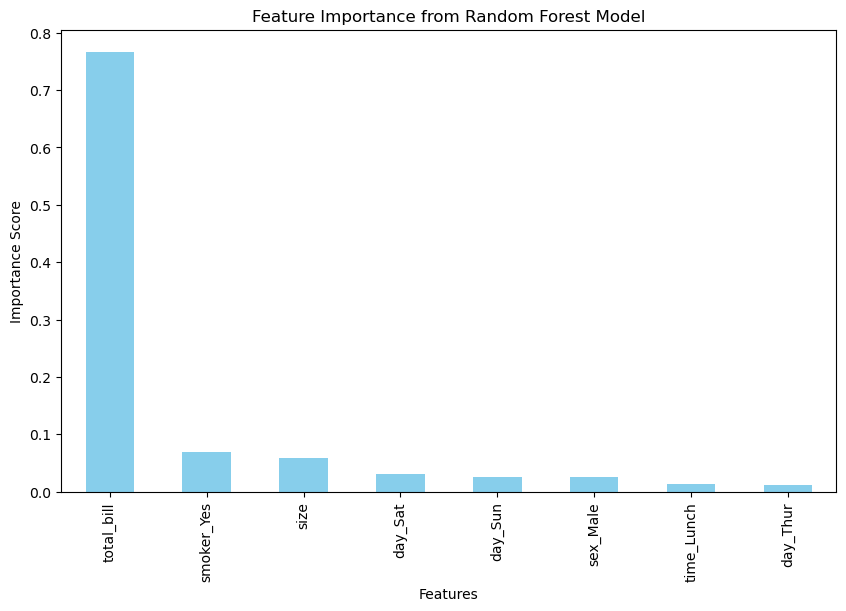

Feature Importances:
 total_bill    0.767043
smoker_Yes    0.069417
size          0.058045
day_Sat       0.030292
day_Sun       0.025223
sex_Male      0.025187
time_Lunch    0.012975
day_Thur      0.011818
dtype: float64


In [75]:
X_with_const = sm.add_constant(X_train)  
ols_model = sm.OLS(y_train, X_with_const).fit()
#print(ols_model.summary())  

feature_importance = pd.Series(forest_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Feature Importance from Random Forest Model")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

print("Feature Importances:\n", feature_importance)


Hence it can be noted that total bill amount plays an import role in influincing tip amount followed by factors like smoker,size,day.

Insights for Management
1. Encourage Higher Spending Through Upselling and Promotions
2. Create a Welcoming Environment for Larger Groups
3. Building of Event organising teams
4. Optimize Service Areas for Smokers
5. Adjust Staffing and Service Focus Based on Day of the Week
6. Incorporate Feedback and Satisfaction Surveys

# Exploratory Data Analysis

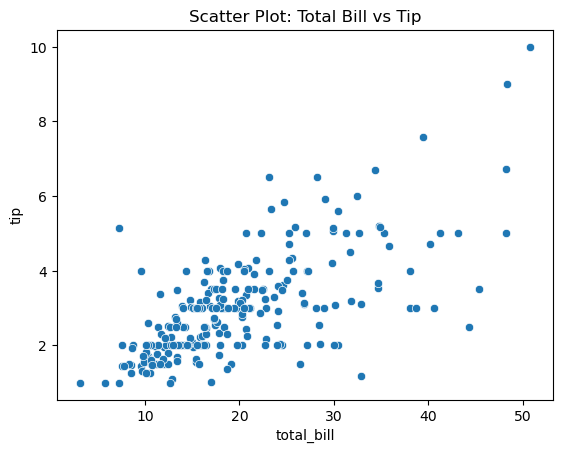

In [76]:
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.show()

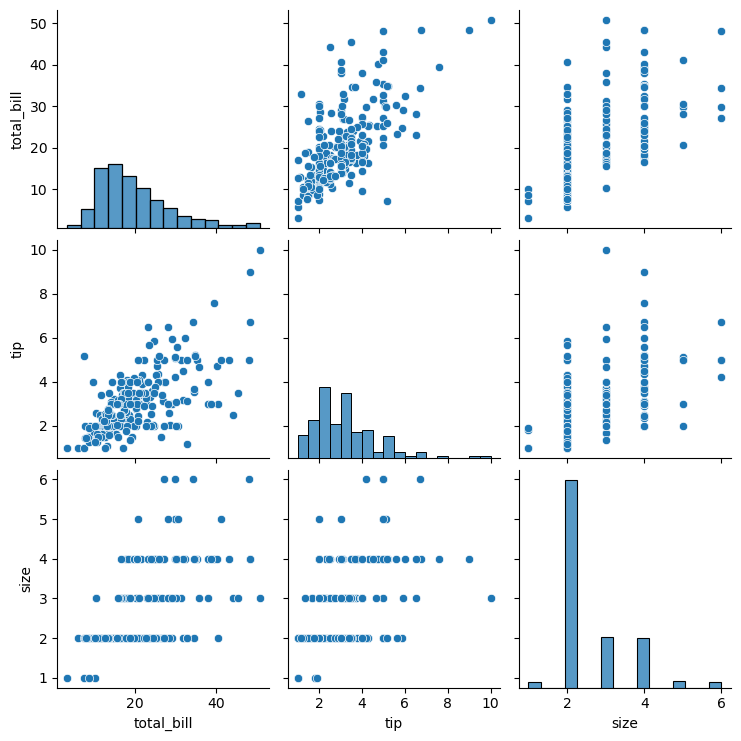

In [77]:
sns.pairplot(data)
plt.show()

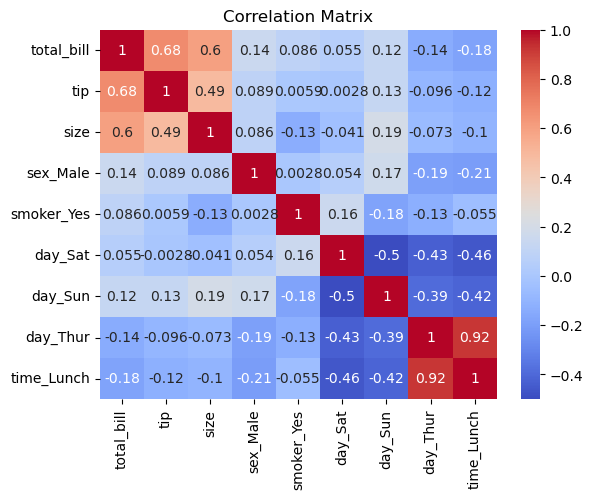

In [78]:
corr_matrix = data_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [79]:
import statsmodels.api as sm
X_with_const = sm.add_constant(X_train[['total_bill']])
model = sm.OLS(y_train, X_with_const).fit()
print("Rainbow Test p-value:", sm.stats.diagnostic.linear_rainbow(model)[1])

Rainbow Test p-value: 0.14525337239342956


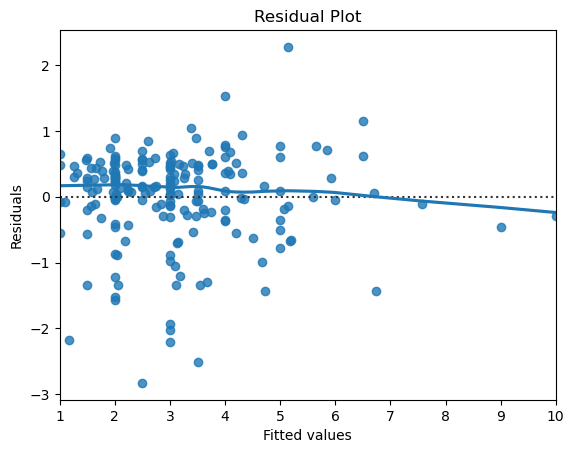

In [80]:
sns.residplot(x=y_train, y=model.resid, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

Based on the given analysis between target value and predictors, it can be concluded that the data follows a "Linear Trend"
Hence Linear model precition is checked

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.6671331480264895
Mean Squared Error (MSE): 0.7033566017436106
Root Mean Squared Error (RMSE): 0.8386635807900631
R² Score: 0.43730181943482493
